# CS294-082 Project Notebook
Referred to [Gerald's Chapter 9](https://piazza.com/redirect/s3?bucket=uploads&prefix=paste%2Fjeqdgp7ec8fv4%2Fbb8d09923f28f8df1326688d66f267909167aa329fce3b0f33616c54e562338e%2FInformation_View_on_Data_Science.pdf) for dataset MEC and progression curve algorithms.
Github repo: https://github.com/mzhang62/CS294-082-Final-Project

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(12,8)})

In [2]:
# Clone the entire repo.
!git clone -s git://github.com/mzhang62/CS294-082-Final-Project.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 4), reused 12 (delta 2), pack-reused 0
Receiving objects: 100% (17/17), 6.77 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/cloned-repo
 balanced_df_with_default_labels.csv   traning_data_mec.csv
'CS294-082 Project Notebook.ipynb'     transformer_data_with_label.csv
 README.md


## Utils for calculating the dataset MEC

In [3]:
feature_cols = 256
# input: dataframe contains labels and thresholds, sorted by descending thresholds
# output: a dictionary with key as labels, value as sums of feature values
# def: iterate through the labels, increment corresponding label's threshold by 1 whenever the label changes
def generate_MEC_dict(df):
    current_class = -1
    # generate an empty dictionary from df, with default value as 0
    mec_dict = dict.fromkeys(df['label'], 0)
    # increment dict value by 1 whenever the class changes
    for index, row in df.iterrows():
        if(row['label'] != current_class):
            mec_dict[row['label']] += 1
            current_class = row['label']
    return mec_dict

# input: dataframe with labels, thresholds, and label occurrences
# output: print out the dataset MEC
# using the formula to calculate MEC: sum(1/pi * log_2(threshold+1)), for all i classes
def calculate_MEC(df):
    mec = 0
    total = df['counts'].sum()
    for index, row in df.iterrows():
        percentage = row['counts'] / total
        # DEPRECATED FUNCTION
        # mec += (1 / percentage) * np.log2(row['threshold'] + 1)
        # NEW FUNCTION FOR MEC  
        mec += np.log2(row['threshold'] + 1) * feature_cols
    print('The total MEC of the dataset is: ', mec)
    return mec

# input: dataframe with all the features, labels (labels in the last column)
# output: print out the dataset MEC
# dataframe manipulation, and calculate the MEC of the dataset
def calc_dataset_MEC(df):
    # extract the preceding feature columns
    cols = df.columns[:feature_cols]
    # added a new column of the sum of features for each instance
    df['sums'] = df[cols].sum(axis=1)
    # count the occurrence for each lable
    df['counts'] = df.groupby(['label'])['label'].transform('count')
    count_df = df[['label', 'counts']]
    count_df = count_df.drop_duplicates(subset=['label']).reset_index(drop=True)
    # generate the mec df with descending feature sums 
    # last three columns label, sum, count
    # sort by descending feature value sums
    mec_df = df.sort_values('sums', ascending=False).iloc[:, -3:].reset_index(drop=True)
    # produce the threshold dict for calculating MEC
    mec_dict = generate_MEC_dict(mec_df)
    # convert the dict into dataframe
    threshold_df = pd.DataFrame(mec_dict.items(), columns=['label', 'threshold'])
    threshold_df = threshold_df.merge(count_df, on='label').sort_values(by=['counts'], ascending=False).reset_index(drop=True)
    return calculate_MEC(threshold_df)

## MEC of the original dataset

In [4]:
data_with_label_df = pd.read_csv("transformer_data_with_label.csv")
calc_dataset_MEC(data_with_label_df);

The total MEC of the dataset is:  160453.1583270134


## MEC of the balanced dataset 
### Only contains classes with more than 100 instances

In [5]:
balanced_df = pd.read_csv('balanced_df_with_default_labels.csv')
calc_dataset_MEC(balanced_df);

The total MEC of the dataset is:  40400.199444830556


## MEC of the training dataset

In [6]:
training_df = pd.read_csv('traning_data_mec.csv')
calc_dataset_MEC(training_df)

The total MEC of the dataset is:  33070.17147091285


33070.17147091285

## Capacity Progression Curve

In [7]:
# input: dataframe with features and label (same as mec df)
# output: dataframe containing mec values for different % of training data
# algorithm 2: sample training data from 5 to 100 percent (step 5) and generate the df 
def progression_curve(df):
    pcurve_df = pd.DataFrame(columns = ['size', 'mec'])
    sizes = [i for i in np.arange(5,101,5)]
#     sizes = [5,10,20,40,80,100]
    # sample the dataset and calculate its MEC
    for size in sizes:
        current_df = df.sample(frac=size/100)
        current_mec = calc_dataset_MEC(current_df)
        pcurve_df = pcurve_df.append({'size' : size, 'mec' : current_mec},
               ignore_index = True)
    return pcurve_df
# pcurve_df = progression_curve(balanced_df)
# pcurve_df = progression_curve(data_with_label_df)
pcurve_df = progression_curve(training_df)
pcurve_df

The total MEC of the dataset is:  12764.046339668048
The total MEC of the dataset is:  17407.261158911573
The total MEC of the dataset is:  19963.65319340767
The total MEC of the dataset is:  21542.514512276157
The total MEC of the dataset is:  23428.144780301536
The total MEC of the dataset is:  24651.458611379585
The total MEC of the dataset is:  25449.510080748467
The total MEC of the dataset is:  26588.931363329266
The total MEC of the dataset is:  27835.4762136017
The total MEC of the dataset is:  28068.970671017403
The total MEC of the dataset is:  29006.448656900222
The total MEC of the dataset is:  29426.953647059294
The total MEC of the dataset is:  29940.169481700254
The total MEC of the dataset is:  30566.779921668727
The total MEC of the dataset is:  31236.697597987742
The total MEC of the dataset is:  31550.169045701
The total MEC of the dataset is:  31999.733190876224
The total MEC of the dataset is:  32337.789605037688
The total MEC of the dataset is:  32704.617052909845

,size,mec
0,5.0,12764.046340
1,10.0,17407.261159
2,15.0,19963.653193
3,20.0,21542.514512
4,25.0,23428.144780
5,30.0,24651.458611
6,35.0,25449.510081
7,40.0,26588.931363
8,45.0,27835.476214
9,50.0,28068.970671


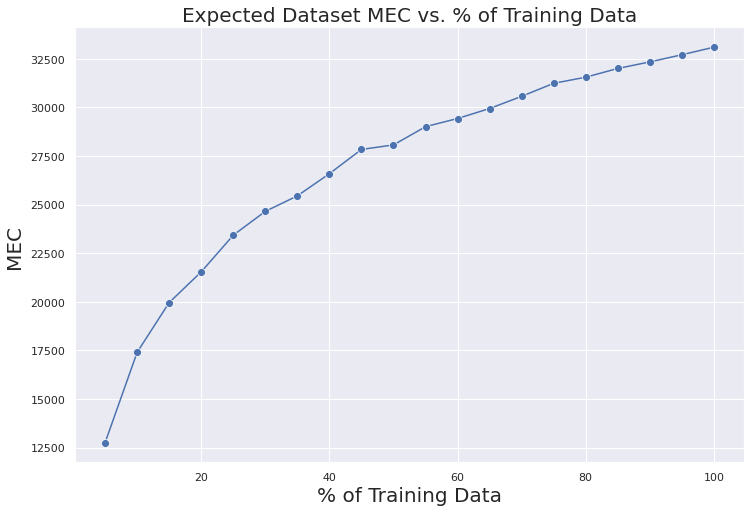

In [10]:
p = sns.lineplot(x='size', y='mec', data=pcurve_df, marker='o', markersize=8)
p.set_xlabel("% of Training Data", fontsize = 20)
p.set_ylabel("MEC ", fontsize = 20)
p.set_title("Expected Dataset MEC vs. % of Training Data", size = 20);

In [8]:
pcurve_df.to_csv("testing.csv")